# 9. Partielle Differentialgleichungen (PDG)

PDG: DGLs mit partiellen Ableitungen in mehreren Variablen

Beispiele: 

- Wellengleichung: $\frac{\partial^2 \phi}{\partial t^2} = v^2 \frac{\partial^2 \phi}{\partial x^2}$
- Diffusionsgleichung: $\frac{\partial \phi}{\partial t} = D \frac{\partial^2 \phi}{\partial x^2}$
- Laplace- und Poissongleichungen: $\nabla^2 \phi = \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} + \frac{\partial^2 \phi}{\partial z^2} = 0$ resp. $\nabla^2 \phi = \rho$
- zeitabhängige Schrödingergleichung: $i \hbar \frac{\partial \phi}{\partial t} = H \phi = - \frac{\hbar}{2m} \frac{\partial^2 \phi}{\partial x^2} + V \phi$
- ...

Im Allgemeinen kann man Probleme in Form von partiellen Differentialgleichungen in zwei Kategorien einteilen:

- Anfangswertprobleme
- Randwertprobleme

In Praxis muss man gemischte Probleme lösen, d.h. die Bedingungen für eine Variable sind in Form von Anfangsbedingungen gegeben (meist in der Zeit) und die Bedingungen in räumlichen Variablen meist in Form von Randwertbedingungen

### Randwertprobleme und die Relaxationsmethode

Betrachte als Beispiel die **Laplacegleichung** in zwei Dimensionen: $\nabla^2 \phi(x,y) = \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2}= 0$

$\phi$: elektrostatisches Potential

Grundlegende Idee der Relaxationsmethode: 

   - Diskretisierung des Problems auf einem endlichen Gitter
   - Approximation der partiellen Ableitungen als endliche Differenzenquotienten 
   - Iteration der Gleichungen bis Konvergenz erreicht ist

Beispiel: eine Box aus leitendem Material, alle Wände außer der oberen geerdet auf Spannung 0. Obere Wand besitzt Spannung $V$: 

<img src="fig9-2.png" alt="Drawing" style="width: 300px;"/>

Nutze reguläres Gitter von Stützstellen mit Abstand $a$ (siehe Abschnitt 5):

$$
\begin{align}
 \frac{\partial^2 \phi}{\partial x^2} &= \frac{\phi(x+a,y)+\phi(x-a,y)-2\phi(x,y)}{a^2} \\
 \frac{\partial^2 \phi}{\partial y^2} &= \frac{\phi(x,y+a)+\phi(x,y-a)-2\phi(x,y)}{a^2}
\end{align}
$$

Also:
$$
\frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2}=
\frac{\phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a)-4\phi(x,y)}{a^2}
$$

Somit lautet die Laplacegleichung in diskretisierter Form:
$$
\phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a)-4\phi(x,y)=0
$$

Mathematisch ist dies nichts anderes als ein Lineares Gleichungssystem für das Potential an den Stützstellen.

Dies kann z.B. mittels des Gauss Eliminationsverfahrens gelöst werden. Aufgrund der ggf. hohen Dimension des Systems ist allerdings die Relaxationsmethode in der Regel effizienter (siehe Abschnitt 7 über nichtlineare Gleichungen).

**Relaxationsmethode (Jacobimethode)**

$$
\phi(x,y) = \frac{1}{4}\left[ \phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a) \right]
$$

- fixiere den Wert von $\phi(x,y)$ an den Randwerten: $\phi = V$ an der oberen Wand und $\phi=0$ an den anderen 3 Wänden
- wähle einen Wert $\phi(x,y)$ im Inneren (dieser Wert muss nicht sehr genau sein, setze z.B. $\phi(x,y) = 0$)
- bestimme neue Werte $\phi'(x,y)$ mittels 
$$\phi'(x,y) = \frac{1}{4}\left[ \phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a) \right]$$ 
- iteriere diese Relation für alle Stützstellen bis $|\phi'-\phi|<\epsilon$ für alle $(x,y)$.

**Beispiel**

Betrachte Box der Kantenlänge 1 m und V=1 Volt:

In [ ]:
from numpy import empty,zeros,max
from pylab import imshow,gray,show
import time

M = 50          # Stützstellenanzahl (ohne Endpunkt)
V = 1.0         # Spannung an der oberen Wand
epsilon = 1e-6  # Genauigkeit

phi = zeros([M+1,M+1],float)
phi[0,:] = V
phiprime = empty([M+1,M+1],float)

start = time.perf_counter()
delta = 1.0 #beliebiger Wert größer epsilon
while delta>epsilon:

    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4

    # maximale Differenz zum alten Wert
    delta = max(abs(phi-phiprime))
    
    # Ersetze alte Werte durch neue Werte
    phi,phiprime = phiprime,phi


end= time.perf_counter()
print(f"Zeit: {end - start:0.4f} Sek.")

# Plot
imshow(phi)
gray()
show()

*Bemerkungen*

- die Genauigkeit $\epsilon$ ist nicht die Genauigkeit der Lösung zur exakte Lösung da wir die Ableitungen durch Differenzenquotienten ersetzt haben! Diese Approximationen kann man prinzipiell verbessern durch:
    - höhere Ordnungen für die Approximation der Ableitungen
    - mehr Stützstellen (kleinere Werte von $a$)
    - beide Optionen können die Laufzeit des Codes erheblich erhöhen

- die Jacobimethode ist nicht immer numerisch stabil, sondern kann zu divergenten Resultaten führen
- als Lösung erhält man $\phi$ nur an den Stützstellen, somit ist im Allgemeinen eine Interpolation notwendig
- es ist nicht immer möglich zu garantieren, dass Stützstellen eines einfachen Stützstellensystems mit den Rändern des Systems zusammenfallen (kompliziertere Geometrien etc.)




**Optimierungen der Ralaxationsmethode**

**1. Overralaxation (siehe Abschnitt 7)**

In jedem Schritt "überschreiten" wir den neuen Wert (siehe Abschnitt zu nichtlineare Gleichungen)

$$\phi'(x,y)=\phi(x,y)+\Delta\phi(x,y)$$

mitttels

$$\phi_w(x,y)=\phi(x,y)+(1+w)\Delta\phi(x,y)$$ 

mit $w>0$:

$$
\begin{align}
\phi_w(x,y)=&\phi(x,y)+(1+w)[\phi'(x,y)-\phi(x,y)]=\\
=&(1+w)\phi'(x,y)-w\phi(x,y)\\\
=&\frac{1+w}{4}[\phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a)]-w\phi(x,y)
\end{align}
$$

Diese Methode kann die Konvergenz der Relaxationsmethode erheblich beschleunigen. Allerdings gibt es keine allgemeine Methode um den besten Wert des Parameters $\omega$ zu bestimmen $\Rightarrow$ im Wesentlichen trial-and-error.

**2. Gauss-Seidel Methode**

Nutze in der Relation 
$$\phi'(x,y) = \frac{1}{4}\left[ \phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a) \right]$$

auf der rechten Seite jeweils schon die neuen berechneten Werte von $\phi$, falls vorhanden

Dies bedeutet man kann das Potential in einem einzigen Array speichern $\Rightarrow$ weniger Speicherverbrauch

Verbindung mit Overrelaxation: Jacobi Overrelaxation numerisch instabil, Gauss-Seidel stabil(er)

Overrelaxation Parameter $w$:

- $w$ groß: schnelle Konvergenz 
- $w$ sehr groß: instabil
- $w<1$: stabil

nicht a priori klar was "groß" quantitativ bedeutet, hängt von Problemstellung ab

Zeit: 2.0619 Sek.


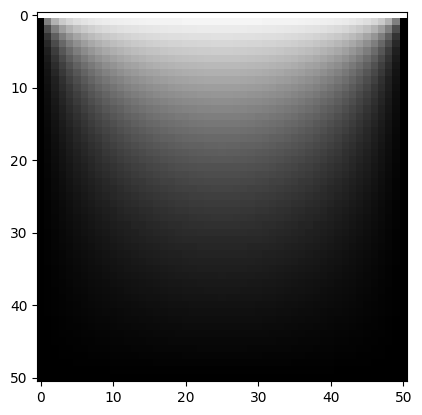

In [1]:
from numpy import empty,zeros,max
from pylab import imshow,gray,show
import time

M = 50          # Stützstellenanzahl (ohne Endpunkt)
V = 1.0         # Spannung an der oberen Wand
epsilon = 1e-6  # Genauigkeit
w = 0.7         # Overralaxationsparameter

phi = zeros([M+1,M+1],float)
phi[0,:] = V

start = time.perf_counter()

delta = 1.0
while delta>epsilon:
    delta = 0.0
    for i in range(M+1):
        for j in range(M+1):
            if i>0 and i<M and j>0 and j<M:
                old = phi[i,j]
                new = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4
                phi[i,j] = phi[i,j] + (1.0+w)*(new - old)
                if abs(new-old) > delta:
                    delta = abs(new-old)

end= time.perf_counter()
print(f"Zeit: {end - start:0.4f} Sek.")

# Plot
imshow(phi)
gray()
show()

Betrachte als Beispiel die **Poissongleichung** in zwei Dimensionen: 

$$\nabla^2 \phi(x,y) = \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2}= - \frac{\rho (x,y)}{\epsilon_0}$$

$$\phi(x,y) = \frac{1}{4}\left[ \phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a) \right] + \frac{a^2}{4 \varepsilon_0} \rho(x,y)$$ 

<div>
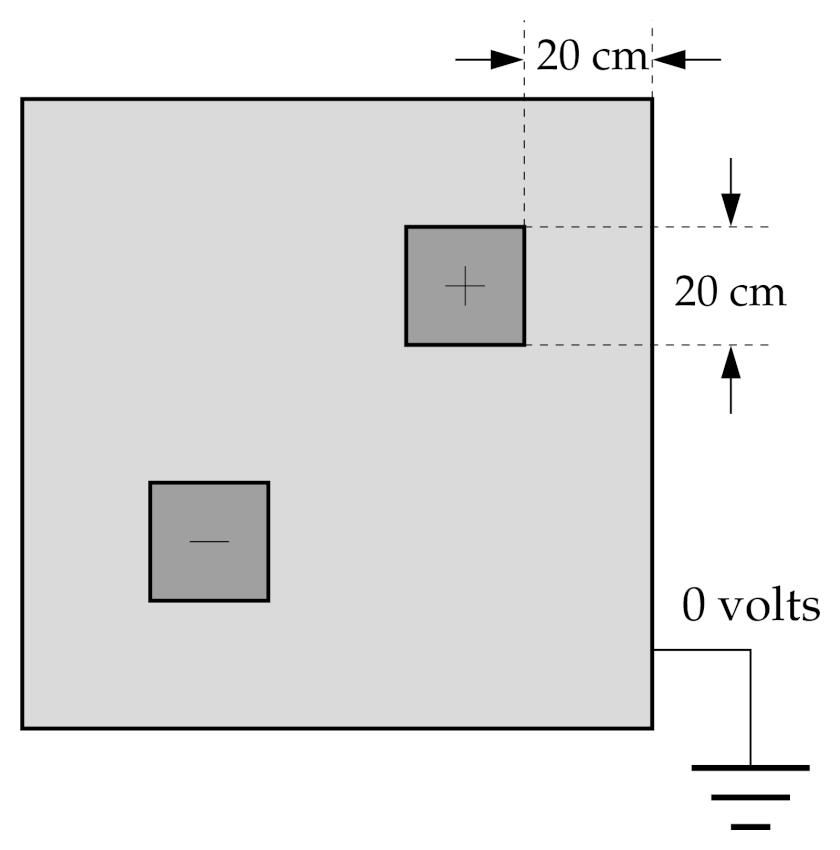 
</div>

Zeit: 0.9158 Sek.


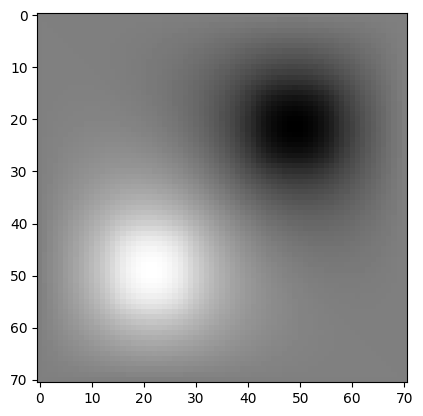

In [2]:
from numpy import empty,zeros,max
from pylab import imshow,gray,show
import time

M = 70          # Anzahl der Stützstellenintervalle
epsilon = 1e-6  # Genauigkeit
w = 0.9         # Overralaxationsparameter
epsilon_0 = 1   # dielektrische Konstante
a = 1/M         # Stützstellenabstand in Metern
rho = 1.0

phi = zeros([M+1,M+1],float)
start = time.perf_counter()

delta = 1.0
while delta>epsilon:
    delta = 0.0
    for i in range(M+1):
        for j in range(M+1):
            if i>0 and i<M and j>0 and j<M:
                old = phi[i,j]
#               Gridpunkt in Bereich der poitiven Ladung (beachte Ursprung des Koordinatensystems ist oben links)
                if i*a >= 0.6 and i*a <= 0.8 and j*a >= 0.2 and j*a <= 0.4:
                    new = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4 + a*a/(4*epsilon_0) * rho
#               Gridpunkt in Bereich der negativen Ladung
                elif i*a >= 0.2 and i*a <= 0.4 and j*a >= 0.6 and j*a <= 0.8:
                    new = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4 - a*a/(4*epsilon_0) * rho
                else:
                    new = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4
                    
                phi[i,j] = phi[i,j] + (1.0+w)*(new - old)
                if abs(new-old) > delta:
                    delta = abs(new-old)

end= time.perf_counter()
print(f"Zeit: {end - start:0.4f} Sek.")

# Plot
imshow(phi)
gray()
show()

### Anfangswertprobleme

Typischerweise sind Bedingungen in den Raumvariablen in Form von Randwertbedingungen gegeben (wie oben) und in Form von Anfangswertbedingungen in der Zeit.

Betrachte z.B. die Diffusionsgleichung

$$\frac{\partial \phi}{\partial t}=D\frac{\partial^2\phi}{\partial x^2}$$

Eine Diskretisierung mittels eines "Raum-Zeit-Grids" analog zur 2D Laplacegleichung funktioniert nicht, da wir im Allgemeinen die Werte der Funktion $\phi$ zu den späteren Zeitpunkten nicht kennen

**Vorwärts-Integrationmethode (Forward integration method, FTCS ('forward time centered-space method'))**

Diskretisiere zunächst die Raumabhängigkeit:

$$\frac{\partial^2\phi}{\partial x^2}= \frac{\phi(x+a,t)+\phi(x-a,t)-2\phi(x,t)}{a^2}$$

$$\Rightarrow \frac{d \phi(x,t)}{dt}=\frac{D}{a^2}[\phi(x+a,t)+\phi(x-a,t)-2\phi(x,t)]$$

Wir erhalten ein System von gewöhnlichen Differentialgleichungen welche mittels der Methoden aus den letzten Vorlesungen gelöst werden können.

Welche Methode sollte benutzt werden?

Für die Form oben ist die Eulermethode ausreichend (**warum?**):

$$\frac{\partial \phi}{\partial t}=f(\phi,t), \quad \phi(t+h) \approx \phi(t) +h\frac{d\phi}{dt}=\phi(t)+hf(\phi,t)$$

Somit in diesem Fall:

$$\phi(x,t+h) = \phi(x,t) +h\frac{D}{a^2}[\phi(x+a,t)+\phi(x-a,t)-2\phi(x,t)]$$

**Beispiel: Die Wärmegleichung**

Betrachte eine Trennwand aus Stahl der Breite 1cm bei einer zu Beginn uniformen Temperatur von 20$^{\circ}$C. Auf der einen Seite befindet sich kaltes Wasser der Temperatur 0$^{\circ}$C und auf der anderen Seite heißes Wasser der Temperatur 50$^{\circ}$C. Wir nehmen an, dass sich die Temperaturen der Wasserreservoire im Laufe der Zeit nicht ändern. Gesucht ist die Temperaturverteilung der Trennwand als Funktion der Zeit.

Die Wäremeleitung wird beschrieben durch die Diffusionsgleichung

$$ \frac{\partial T}{\partial t}= D \frac{\partial^2 T}{\partial x^2} $$

Für die praktische Lösung dieser Gleichung unterteilen wir die Trennwand entlang der Breite in 100 Intervalle (101 Stützstellen) 

$T_{\text{high}}$=50$^{\circ}$C (heißes Wasserreservoir) 

$T_{\text{mid}}$=20$^{\circ}$C (uniforme Temperatur der Trennwand bei $t=0$s)

$T_{\text{low}}$=0$^{\circ}$C (kaltes Wasserreservoir)

Thermale Leitfähigkeit: $D=4.25 \times 10^{-6}$m$^2$s$^{-1}$

Berechne Temperaturprofile zu den Zeitpunkten $t=$0.01s, 0.1s, 0.4s, 1s, und 10s

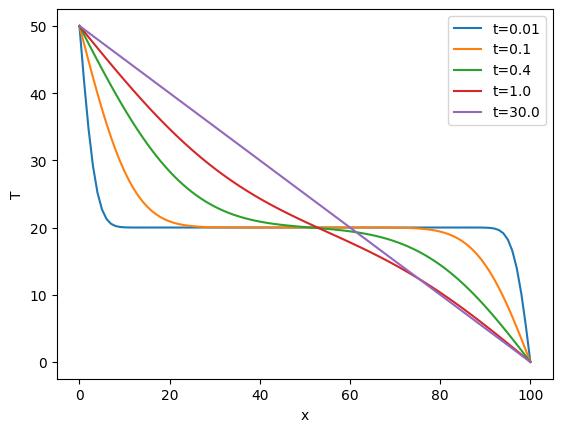

In [3]:
from numpy import empty
from pylab import plot,xlabel,ylabel,show,legend

# Konstanten
L = 0.01      # Wanddicke in Metern
D = 4.25e-6   # Thermale Leitfähigkeit
N = 100       # Anzahl der Intervalle entlang der Breite der Wand
a = L/N       # Stützstellenabstand
h = 1e-4      # Schrittweite in Zeit
epsilon = h/1000

Tlow = 0.0     # Temperatur des kalten Wasserreservoirs (konstant)
Tmid = 20.0    # Anfangstemperatur des Trennwand
Thigh = 50.0   # Temperatur des heissen Wasserreservoirs (konstant)

t1 = 0.01
t2 = 0.1
t3 = 0.4
t4 = 1.0
t5 = 30.0
tend = t5 + epsilon

T = empty(N+1,float)
T[0] = Thigh
T[N] = Tlow
T[1:N] = Tmid
Tp = empty(N+1,float)
Tp[0] = Thigh
Tp[N] = Tlow

t = 0.0
c = h*D/(a*a)
while t<tend:

    # Berechne neue Werte der Temperatur
    Tp[1:N] = T[1:N] + c*(T[2:N+1] + T[0:N-1] - 2*T[1:N])
    T,Tp = Tp,T
    t += h

    # Generiere Plots zu den gegeben Zeiten
    if abs(t-t1)<epsilon:
        plot(T,label="t="+str(t1))
    if abs(t-t2)<epsilon:
        plot(T,label="t="+str(t2))
    if abs(t-t3)<epsilon:
        plot(T,label="t="+str(t3))
    if abs(t-t4)<epsilon:
        plot(T,label="t="+str(t4))
    if abs(t-t5)<epsilon:
        plot(T,label="t="+str(t5))

xlabel("x")
ylabel("T")
legend()
show()

### Numerische Stabilität

FTCS Methode ist allerdings instabil für gewisse DGLs. Betrachte z.B. eine Welle in einer Dimension:

$$\frac{\partial^2\phi}{\partial t^2}=v^2\frac{\partial^2\phi}{\partial x^2}$$

$$\Rightarrow \frac{\partial^2\phi}{\partial t^2} = \frac{v^2}{a^2}[\phi(x+a,t)+\phi(x-a,t)-2\phi(x,t)]$$

Transformiere DGL in ein System zweier gewöhnlicher DGL erster Ordnung:

$$
\begin{align}
\frac{d\phi}{dt}=&\Phi(x,t)\\
\frac{d\Phi}{dt}=&\frac{v^2}{a^2}[\phi(x+a,t)+\phi(x-a,t)-2\phi(x,t)]
\end{align}
$$

Die Eulermethode liefert dann:

$$
\begin{align}
\phi(x,t+h)=&\phi(x,t) + h \Phi(x,t)\\
\Phi(x,t+h)=&\Phi(x,t)+h\frac{v^2}{a^2}[\phi(x+a,t)+\phi(x-a,t)-2\phi(x,t)]
\end{align}
$$

<img src="unstable.png" alt="Drawing" style="width: 500px;"/>

Lösung ist also nur für kleine Zeitintervalle numerisch stabil.

**Codebeispiel: FCTS Lösung der Wellengleichung**

<img src="piano.pdf" alt="Drawing" style="width: 500px;"/>

In [ ]:
from numpy import empty
from numpy import linspace
from numpy import arange
from numpy import exp
from numpy import zeros
from pylab import plot,xlabel,ylabel,show,legend

v = 100
L = 1         # Länge der Saite
d = 0.1       # Abstand des Hammers vom Saitenende
C = 1
sigma = 0.3
N = 100       # Anzahl der Intervalle entlang der Saite
a = L/N       # Stützstellenabstand
h = 1e-6     # Schrittweite in Zeit
epsilon = h/100

phi = zeros(N,float)
phi_new = zeros(N,float)
psi = zeros(N,float)
psi_new = zeros(N,float)
xvec = linspace(0,L,N)

T = 0.15   # letzter Zeitpunkt
t_step = h*100
tvec = arange(0,T,t_step)
Nt = len(tvec)     # Zahl der Zeitschritte

solution = zeros([N,Nt],float)

for x in range(N):
    psi[x] = C*xvec[x]*(L-xvec[x])/L**2*exp(-(xvec[x] - d)**2/(2*sigma**2))
    
tend = tvec[Nt-1] + epsilon
tindex = 1

t = 0.0
while t<tend:

    # Berechne neue Werte von phi und psi
    phi_new[1:N-1] = phi[1:N-1] + h*psi[1:N-1]
    psi_new[1:N-1] = psi[1:N-1] + h*v**2/a**2*(phi[2:N] + phi[0:N-2] - 2*phi[1:N-1])
    
    phi,phi_new = phi_new,phi
    psi,psi_new = psi_new,psi
    t += h
    
    # speichere Lösungen für phi(x) bei gegebenen Zeiten
    if (tindex < Nt-1) and abs(t-tvec[tindex])<epsilon:
        solution[:,tindex] = phi[:]
        tindex+=1

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.pyplot as plt

factor = 1e3

# Animation der Lösung
fig = plt.figure()
ax = plt.axes(xlim=(0, 1),ylim=(-1,1))
line, = ax.plot([], [])

# Initialisierung
def init():
    line.set_data([], [])
    return line,

# Animationsfunktion. Diese Funktion wird sequentiell aufgerufen
def animate(i):
    line.set_data(xvec, factor*solution[:,i])
    return line,

anim = animation.FuncAnimation(fig, animate, frames=Nt,
                              interval=7, blit=True, init_func=init)

HTML(anim.to_html5_video())

Beachte die Verwendung des Kommas in den Funktionen oben um eine Liste mit einem Element zu entpacken, z.B.:

In [ ]:
a = [1]
b, = a
print(a,b)

### Lösung von PDGs mittels Fouriertransformation

Betrachte eine Saite der Länge L welche fest an den Endpunkten ($x$=0 und $x$=L) fixiert ist, also $\phi=0$.

Wir entwickeln die Lösung in Fourierkomponenten in Ort und Zeit: 

$$\phi_k(x,t)= \sum_k b_k \sin \left(\frac{\pi kx}{L}\right) e^{iwt}$$

Für ganzzahlige Werte von $k$ sind die Randbedingungen im Ort erfüllt. Die Ausbreitunggeschwindigkeit der Welle ist dann gegeben durch:

$$\frac{\partial^2\phi}{\partial t^2}=v^2\frac{\partial^2\phi}{\partial x^2} \quad \Rightarrow \quad \omega = \frac{\pi v k}{L}$$

Unterteile die Saite in $N$ gleiche Intervalle: $$x_n=\frac{n}{N} L$$

Die Lösung an diesen Punkten kann dann geschrieben werden in der Form

$$\phi_k(x_n,t)= \frac{1}{N}\sum_{k=1}^{N-1} b_k\sin \left(\frac{\pi kn}{N}\right) \exp \left(\frac{i \pi vkt}{L}\right)$$

für beliebige Koeffizienten $b_k$.

Für $t=0$ gilt:

$$\phi_k(x_n,0)=\frac{1}{N} \sum_{k=1}^{N-1} b_k \sin \left(\frac{\pi kn}{N}\right) = \frac{1}{N} \sum_{k=1}^{N-1} \alpha_k \sin \left(\frac{\pi kn}{N}\right)$$

mit $b_k=\alpha_k + i \eta_k$

Zeitableitung bei t=0:

$$\left. \frac{\partial \phi (x_n,t)}{\partial t} \right|_{t=0} =-\left(\frac{\pi v}{L}\right)\frac{1}{N} \sum_{k=1}^{N-1}  k \eta_k \sin \left(\frac{\pi kn}{N}\right)$$

Die Anfangsbedingungen für $\phi$ und $\partial_t \phi$ bei $t=0$ liefern 2N Bedingungen um die Koeffizienten $\alpha_k$ und $\eta_k$ zu fixieren. Dies bestimmt dann die Lösung zu beliebigen Zeiten:

$$
\phi_k(x_n,t)= \frac{1}{N}\sum_{k=1}^{N-1} 
\left[ 
\alpha_k \cos\left(\frac{\pi vkt}{L}\right)- \eta_k \sin\left(\frac{\pi vkt}{L}\right) 
\right]
\sin \left(\frac{\pi kn}{N}\right)
$$

Hier sind keine Iterationschritte in der Zeit notwendig. Durch Nutzung der Schnellen Fouriertransformation (FFT) kann man alle Operationen in $N \log N$ Operationen ausführen. FTCS benötigt $N$ pro Zeitschritt.

*Bemerkungen*

   - Fouriermethoden sind nur effizient anwendbar falls die Randbedingungen einfach sind
   - nur nützlich für lineare DGLs, für nichtlineare DGLs sind die verschiedenen Fouriermoden nicht mehr unabhängig voneinander

## Von Neumann Stabilitätsanalyse für lineare DGLs

betrachte die Diffusions DGL:

$$\frac{\partial \phi}{\partial t}=D\frac{\partial^2\phi}{\partial x^2}$$

also in diskretisierter Form:

$$\phi(x,t+h)=\phi(x,t)+h\frac{D}{a^2}[\phi(x+a,t)+\phi(x-a,t)-2\phi(x,t)]$$

Entwickle die Ortsabhängigleit von $\phi$ zu einem Zeitpunkt bei $t$ in Form einer Fourier Reihe $\phi(x,t)=\sum_k c_k(t)e^{ikx}$

Damit gilt dann:
$$
\begin{align}
\phi(x,t+h)=& \sum_k c_k(t)e^{ikx}+h\frac{D}{a^2}c_k(t)[e^{ik(x+a)}+e^{ik(x-a)}-2e^{ikx}]\\
=& \sum_k [1+h\frac{D}{a^2}(e^{ika}+e^{-ika}-2)]c_k(t)e^{ikx}\\
=& \sum_k [1-h\frac{4D}{a^2}\sin^2\frac{1}{2}ka]c_k(t)e^{ikx}
\end{align}
$$

Dies bedeutet jeder Fourierterm entwickelt sich unabhängig in der Zeit, keine Kopplungsterme verschiedener $k$ Indizes und keine explizite Zeit- oder Ortsabhängigkeit in der Relation

$$ \Rightarrow c_k(t+h)=\left[ 1-h\frac{4D}{a^2}\sin^2\frac{1}{2}ka \right] c_k(t)$$

$\Rightarrow$ falls $\left[ 1-h\frac{4D}{a^2}\sin^2\frac{1}{2}ka \right] >1$ für einen Wellenvektor k, dann wird diese Fourierkomponente exponentiell größer mit jedem Zeitentwicklungsschritt, Zeitententwicklung stabil falls $h\le\frac{a^2}{2D}$

**Analyse für Wellengleichung**

$$\frac{\partial^2\phi}{\partial t^2}=v^2\frac{\partial^2\phi}{\partial x^2}$$

$$
\left( \begin{array}{c}
\phi(x,t)\\
\Phi(x,t)
\end{array} \right)= \sum_k
\left( \begin{array}{c}
c_\phi(t)\\
c_\Phi(t)
\end{array} \right) e^{ikx} = \sum_k \mathbf{c} (t) e^{ikx}
$$

Für die Koeffizienten gilt:
$$
\begin{align}
c_\phi(t+h)=&c_\phi(t)+hc_\Phi(t)\\
c_\Phi(t+h)=&c_\Phi(t)-hc_\phi(t)\frac{4V^2}{a^2}\sin^2\frac{1}{2}ka
\end{align}
$$

$$\mathbf{c}(t+h)=\mathbf{A} \mathbf{c}(t) \quad \text{mit} \quad \mathbf{A}=\left( 
\begin{array}{cc}
1&h\\
-hr^2&1
\end{array} \right) 
$$
und $r=\frac{2V}{a}\sin\frac{1}{2}ka$

Schreibe $\mathbf{c}(t)$ als Linearkombination der Eigenvektoren von $\mathbf{A}$:

$$
\begin{align}
\mathbf{c}(t)&=\alpha_1 \mathbf{v}_1+\alpha_2 \mathbf{v}_2 \\
\mathbf{c} (t+h)&=\mathbf{A} (\alpha_1 \mathbf{v}_1+\alpha_2 \mathbf{v}_2)= \alpha_1 \lambda_1 \mathbf{v}_1+\alpha_2 \lambda_2 \mathbf{v}_2
\end{align}
$$

Im nächsten Schritt erhält man dann analog:
$$\mathbf{c} (t+2h) = \alpha_1 \lambda_1^2 \mathbf{v}_1 + \alpha_2 \lambda_2^2 \mathbf{v}_2$$

und nach $m$ Schritten:

$$\mathbf{c} (t+mh) = \alpha_1 \lambda_1^m \mathbf{v}_1 + \alpha_2 \lambda_2^m \mathbf{v}_2$$

falls $\lambda_1>1$ oder $\lambda_2>1$ $\Rightarrow$ Lösung divergiert

falls $\lambda_1<1$ oder $\lambda_2<1$ $\Rightarrow$ alle Fourierkomponenten mit $k>0$ werden unterdrückt 

Berechne Eigenwerte für Wellengleichung: 

$\lambda_{1/2} = 1 \pm i h r$ also $|\lambda_{1/2}|=\sqrt{1+h^2r^2}=\sqrt{1+\frac{4V^2}{a^2}\sin^2\frac{1}{2}ka}$

immer größer als 1, egal wie klein die Schrittweite $h$! 

$\Rightarrow$ FTCS Methode immer instabil für Wellengleichung

### Implizite Methoden und Crank-Nicolson Methoden

Ersetze $h \rightarrow -h$ in den folgenden Schritten:

$$
\begin{align}
\phi(x,t+h)=&\phi(x,t) + h \Phi(x,t)\\
\Phi(x,t+h)=&\Phi(x,t)+h\frac{v^2}{a^2}[\phi(x+a,t)+\phi(x-a,t)-2\phi(x,t)]
\end{align}
$$

Wir erhalten:

$$
\begin{align}
\phi(x,t-h)=&\phi(x,t) - h \Phi(x,t)\\
\Phi(x,t-h)=&\Phi(x,t)-h\frac{v^2}{a^2}[\phi(x+a,t)+\phi(x-a,t)-2\phi(x,t)]
\end{align}
$$


Nach einer Substitution $t \rightarrow t+h$ erhalten wir

$$
\begin{align}
\phi(x,t)=&\phi(x,t+h) - h \Phi(x,t+h)\\
\Phi(x,t)=&\Phi(x,t+h)-h\frac{v^2}{a^2}[\phi(x+a,t+h)+\phi(x-a,t+h)-2\phi(x,t+h)]
\end{align}
$$

Dies sind implizite Gleichungen für $\phi(x,t+h)$ und $\Phi(x,t)$. 


Von-Neuman Stabilitätsanalyse: Die Zeitevolution der Fourierkoeffizienten wird hier bestimmt durch die Matrix $\mathbf{B}$ mit (vergleiche $\mathbf{A}=\left( 
\begin{array}{cc}
1&h\\
-hr^2&1
\end{array} \right) 
$)

$$
\mathbf{B}=\left( 
\begin{array}{cc}
1&-h\\
hr^2&1
\end{array} \right) 
$$

Für die Eigenwerte dieser Matrix gilt:

$$|\lambda| = \frac{1}{\sqrt{1 + h^2 r^2}} < 1$$


Das heißt die numerische Lösung ist stabil aber unphysikalisch da alle Fourierkomponenten mit $k > 0$ unterdrückt werden und daher nach hinreichend langer Zeit nur noch die Fourierkomponente zu $k=0$ verbleibt. Physikalische Lösungen erfordern $|\lambda| = 1$. In Natur können Wellen ohne Unterdrückung propagieren. 

**Crank-Nicolson Methode = Mittelung der Eulerlösung und der impliziten Lösung**

Euler:
$$
\begin{align}
\phi(x,t+h)=&\phi(x,t) + h \Phi(x,t)\\
\Phi(x,t+h)=&\Phi(x,t)+h\frac{v^2}{a^2}[\phi(x+a,t)+\phi(x-a,t)-2\phi(x,t)]
\end{align}
$$

Implizit:
$$
\begin{align}
\phi(x,t)=&\phi(x,t+h) - h \Phi(x,t+h)\\
\Phi(x,t)=&\Phi(x,t+h)-h\frac{v^2}{a^2}[\phi(x+a,t+h)+\phi(x-a,t+h)-2\phi(x,t+h)]
\end{align}
$$

Mittelung:
$$
\phi(x,t+h)- \frac{1}{2}h \Phi(x,t+h)=\phi(x,t)+\frac{1}{2}h \Phi(x,t)\\
\Phi(x,t+h)-h\frac{v^2}{2a^2}[\phi(x+a,t+h)+\phi(x-a,t+h)-2\phi(x,t+h)]=\Phi(x,t)+h\frac{v^2}{2a^2}[\phi(x+a,t)+\phi(x-a,t)-2\phi(x,t)]
$$

Die Zeitentwicklung der Fourierkomponenten dieser Relationen ist gegeben durch

$$
\mathbf{c} (t+h) = \mathbf{B}^{-1} \mathbf{A} \mathbf{c} (t)
$$

Die Eigenwerte des Matrixproduktes $\mathbf{B}^{-1} \mathbf{A}$ sind in der Tat $|\lambda| = 1$. Somit liefert diese Methode für die Wellengleichung physikalisch sinnvolle Resultate.

### Crank-Nicolson Methode für die Wellengleichung

Für die Anwendung auf die klassische Wellengleichung schreiben wir:
    
$$
\mathbf{A} (\boldsymbol{\phi},\boldsymbol{\Phi}) (t+h) = B ( \boldsymbol{\phi}, \boldsymbol{\Phi}) (t)
$$

wobei die Indizes der Matrizen über die Abstandskoordinate der Saite und die Vektoren $\boldsymbol{\phi},\boldsymbol{\Phi}$ laufen. Die Dimension der Matrizen ist also $2N \times 2N$. Da die DGL nur maximal 3 benachbarte Punkte koppelt sind die Matrizen tridiagonal in den Abstandsindizes.

In [ ]:
from numpy import empty
from numpy import linspace
from numpy import arange
from numpy import exp
from numpy import zeros
from pylab import plot,xlabel,ylabel,show,legend
from numpy.linalg import inv
from numpy import dot

v = 100
L = 1         # Länge der Saite
d = 0.1       # Abstand des Hammers vom Saitenende
C = 1
sigma = 0.3
N = 100       # Anzahl der Intervalle entlang der Saite
a = L/N       # Stützstellenabstand
h = 1e-6      # Schrittweite in Zeit
epsilon = h/100

phipsi = zeros(2*N,float)
phipsi_new = zeros(2*N,float)

phi = zeros(N,float)
psi = zeros(N,float)
xvec = linspace(0,L,N)

T = 0.3   # letzter Zeitpunkt
t_step = h*100
tvec = arange(0,T,t_step)
Nt = len(tvec)     # Zahl der Zeitschritte

solution = zeros([N,Nt],float)

for x in range(N):
    psi[x] = C*xvec[x]*(L-xvec[x])/L**2*exp(-(xvec[x] - d)**2/(2*sigma**2))

for i in range(N):
    phipsi[i] = phi[i]
    phipsi[i+N] = psi[i]
    
tend = tvec[Nt-1] + epsilon
tindex = 1

A_matrix = zeros([2*N,2*N],float)
for i in range(2*N):
    A_matrix[i,i] = 1.0
for i in range(N):
    A_matrix[i,i+N] = -h/2
for i in range(1,N-1):
    A_matrix[i+N,i-1] = -h*v**2/(2*a**2)
    A_matrix[i+N,i]   = 2.0*h*v**2/(2*a**2)
    A_matrix[i+N,i+1] = -h*v**2/(2*a**2)    

# muss nur einmal berechnet werden, daher explizite Berechnung der Inversen ausnahmsweise okay :-)
Ainv_matrix = inv(A_matrix)

B_matrix = zeros([2*N,2*N],float)
for i in range(2*N):
    B_matrix[i,i] = 1.0
for i in range(N):
    B_matrix[i,i+N] = h/2
for i in range(1,N-1):
    B_matrix[i+N,i-1] = h*v**2/(2*a**2)
    B_matrix[i+N,i]   = -2.0*h*v**2/(2*a**2)
    B_matrix[i+N,i+1] = h*v**2/(2*a**2)

AinvB = dot(Ainv_matrix,B_matrix)

t = 0.0
while t<tend:
    
    # Berechne neue Werte von phi und psi    
    phipsi_new = dot(AinvB,phipsi)
    phi = phipsi_new[:N]
    phipsi,phipsi_new = phipsi_new,phipsi
    
    t += h
    
    # speichere Lösungen für phi(x) bei gegebenen Zeiten
    if (tindex < Nt-1) and abs(t-tvec[tindex])<epsilon:
        solution[:,tindex] = phi[:]
        tindex+=1

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.pyplot as plt

factor = 1e3

# Animation der Lösung
fig = plt.figure()
ax = plt.axes(xlim=(0, 1),ylim=(-1,1))
line, = ax.plot([], [])

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(xvec, factor*solution[:,i])
    return line,

anim = animation.FuncAnimation(fig, animate, frames=Nt,
                              interval=7, blit=True, init_func=init)

HTML(anim.to_html5_video())